In [12]:
import pandas as pd
data_neg = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
data_neg['cleaned_text'] = data_neg['cleaned_text'].astype(str)
texte = ' '.join(data_neg['cleaned_text'])

In [2]:
data_neg

,rate,review_text,object_address,sentiment,cleaned_text
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,formation financement refus refus parcours inu...
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci faire rond p...
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,fonctionnaire incompétent arrogant prétentieux...
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci air hautain ...
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,étoile mettrai conseiller indemnisation désagr...
...,...,...,...,...,...
5879,1,"La gentillesse chez vous , c’est pas une quali...","45 Av. Billaud Varenne, 17000 La Rochelle",0,gentillesse qualité désagréable accueil
5880,1,Le 3949 est le pire numéro de renseignement qu...,"45 Av. Billaud Varenne, 17000 La Rochelle",0,3949 pire numéro renseignement malheur
5881,1,Incompétents.,"45 Av. Billaud Varenne, 17000 La Rochelle",0,incompétent
5882,1,Sourires en option,"45 Av. Billaud Varenne, 17000 La Rochelle",0,sourire option


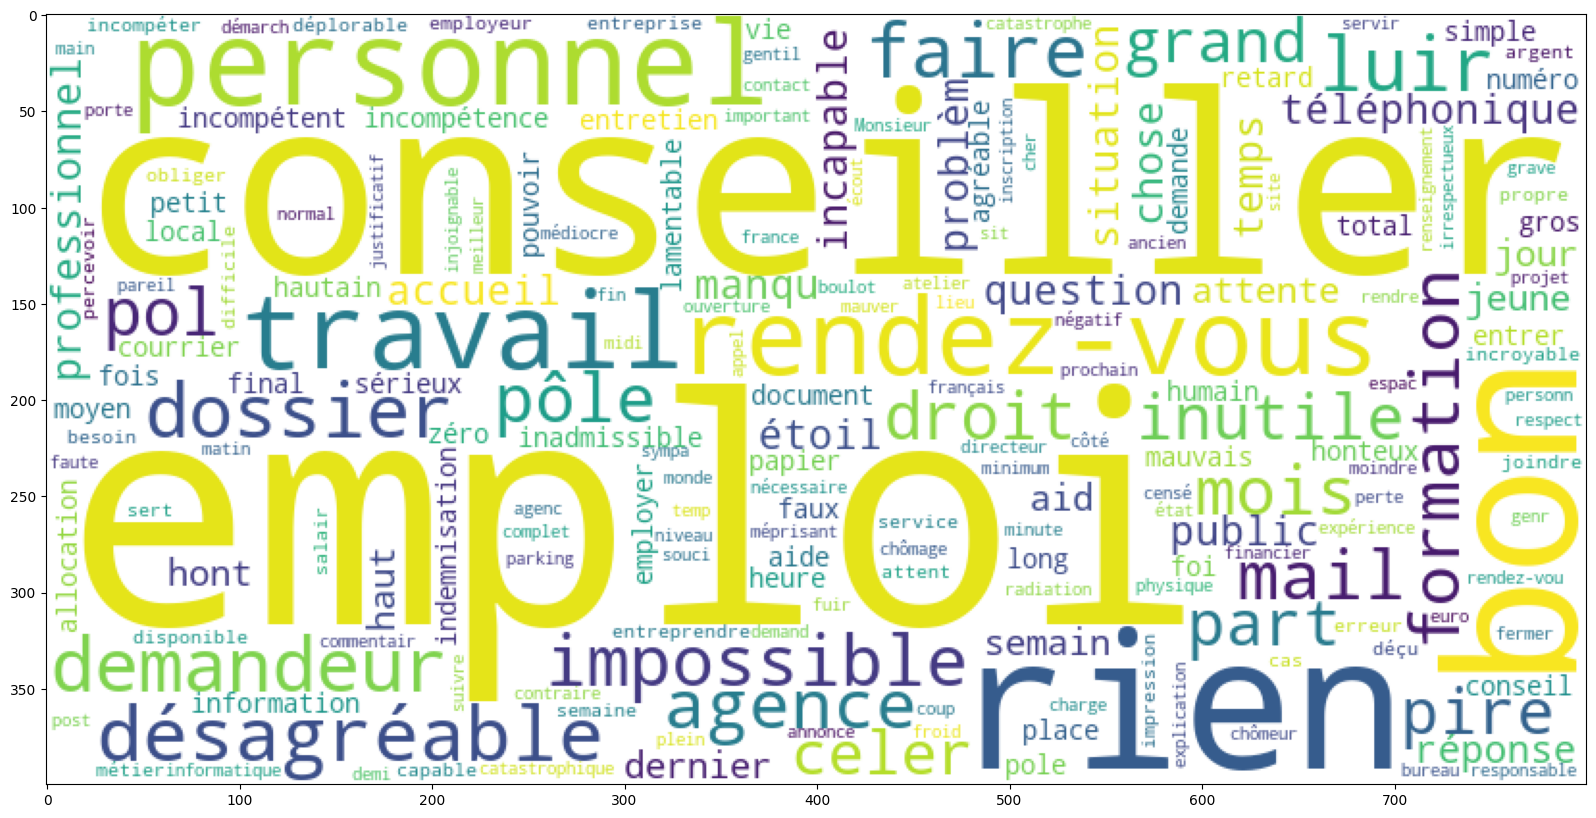

In [6]:
import pandas as pd
data_neg = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
data_neg['cleaned_text'] = data_neg['cleaned_text'].astype(str)
texte = ' '.join(data_neg['cleaned_text'])
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000

# Texte d'exemple


# Analyse de dépendance des phrases et lemmatisation
doc = nlp(texte)
dependances_incluses = ['nsubj', 'xcomp', 'obl:mod', 'acl', 'conj', 'amod']
stop_words = spacy.lang.fr.stop_words.STOP_WORDS
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(lemmatized_terms)
WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(occurrence_terms).to_file("wordcloud.png")
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(occurrence_terms))

In [21]:
gouped_data = data_neg.groupby('object_address')['cleaned_text'].agg(lambda x: ' '.join(x)).reset_index()


In [22]:
gouped_data

,object_address,cleaned_text
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...
2,"1 All. des Citronniers, 44000 Nantes",aimable porte prison habitude aucun respect vi...
3,"1 All. des Fabricants, 59150 Wattrelos",fuir conseiller fantôme inexistant incompétent...
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...
...,...,...
586,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse
587,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...
588,"ZA les Rodettes, 34120 Pézenas",expérience voleur manipulateur bien assedic 46...
589,"Zac De, Tessan, 30120 Le Vigan",horaire ouverture population accueil correct m...


In [ ]:
occurrence_terms

Counter({'emploi': 1575,
         'conseiller': 916,
         'rien': 446,
         'bon': 429,
         'personnel': 338,
         'rendez-vous': 277,
         'travail': 273,
         'désagréable': 238,
         'dossier': 223,
         'demandeur': 219,
         'faire': 214,
         'luir': 214,
         'impossible': 200,
         'mail': 192,
         'formation': 190,
         'agence': 186,
         'mois': 178,
         'pôle': 177,
         'droit': 171,
         'pol': 170,
         'inutile': 161,
         'pire': 161,
         'part': 161,
         'grand': 153,
         'celer': 152,
         'téléphonique': 151,
         'professionnel': 150,
         'incapable': 147,
         'public': 146,
         'temps': 143,
         'question': 142,
         'étoil': 142,
         'accueil': 140,
         'situation': 138,
         'problèm': 137,
         'manqu': 136,
         'chose': 135,
         'réponse': 127,
         'hont': 120,
         'jour': 115,
         'attente

In [18]:
lemmatized_terms

['financement',
 'refu',
 'refu',
 'parcour',
 'inutile',
 'réactif',
 'absurde',
 'souci',
 'bunker',
 'classe',
 'droit',
 'souci',
 'hautain',
 'discriminant',
 'accumuler',
 'médiocre',
 'désagréable',
 'agacer',
 'rappel',
 'mail',
 'commentair',
 'remarqu',
 'quite',
 'hautain',
 'démarche',
 'méprisable',
 'celer',
 'envier',
 'fouillis',
 'mauvais',
 'expérience',
 'général',
 'inaccessible',
 'moment',
 'région',
 'agenc',
 'rue',
 'impossible',
 'conseiller',
 'site',
 'accueil',
 'concilier',
 'local',
 'post',
 'libre',
 'disposition',
 'document',
 'document',
 '30min',
 'prendre',
 'moyen',
 'gros',
 'conseiller',
 'conseiller',
 'mail',
 'moquer',
 'semaine',
 'horaire',
 'disponible',
 'informatique',
 'priorité',
 'humain',
 'e-mail',
 'pouvoir',
 'injoignable',
 'informatique',
 'humain',
 'répèt',
 'affaire',
 'odieux',
 'écout',
 'informatique',
 'pire',
 'respect',
 'ado',
 'roul',
 'oeil',
 'reconversion',
 'immonde',
 'puéril',
 'irrespectueux',
 'direction',
 'g

In [21]:
import pandas as pd
data_neg = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
data_neg['cleaned_text'] = data_neg['cleaned_text'].astype(str)
texte = ' '.join(data_neg['cleaned_text'])
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000

texte = "Pas de formation possible Pas de financement possible refus sur refus de parcours Et rendez vous régulier inutile. Dire que soit disant on est la pour Aider les chômeurs a être réactif. Absurde !"


# Analyse de dépendance des phrases et lemmatisation
doc = nlp(texte)
dependances_incluses = ['nsubj', 'xcomp', 'obl:mod', 'acl', 'conj', 'amod']
stop_words = spacy.lang.fr.stop_words.STOP_WORDS
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(lemmatized_terms)



In [22]:
occurrence_terms  


Counter({'rendre': 1, 'régulier': 1, 'inutile': 1})

In [8]:
import spacy
from collections import Counter
from itertools import tee, islice

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")

# Texte d'exemple avec des phrases
#texte = "Ce film était incroyablement captivant, avec une intrigue bien construite et des rebondissements inattendus. Les acteurs ont livré des performances exceptionnelles."

# Analyse de texte avec SpaCy
doc = nlp(texte)

# Fonction pour conserver les phrases
def keep_sentences(doc):
    for sent in doc.sents:
        yield sent

# Lemmatisation des tokens
lemmatized_tokens = [token.lemma_ for sentence in keep_sentences(doc) for token in sentence]

# Génération des bi-grammes et tri-grammes
bi_grams = Counter(zip(lemmatized_tokens, islice(lemmatized_tokens, 1, None)))
tri_grams = Counter(zip(lemmatized_tokens, islice(lemmatized_tokens, 1, None), islice(lemmatized_tokens, 3, None)))

# Affichage des bi-grammes les plus courants
print("Bi-grammes les plus courants:")
for bi_gram, count in bi_grams.most_common(10):
    print(bi_gram, ":", count)

# Affichage des tri-grammes les plus courants
print("\nTri-grammes les plus courants:")
for tri_gram, count in tri_grams.most_common(10):
    print(tri_gram, ":", count)


Bi-grammes les plus courants:
('pôle', 'emploi') : 907
('demandeur', 'emploi') : 218
('pol', 'emploi') : 141
('recherche', 'emploi') : 95
('aucun', 'aide') : 93
('service', 'public') : 87
('aucun', 'réponse') : 80
('trop', 'percevoir') : 73
('sert', 'rien') : 72
('bon', 'rien') : 67

Tri-grammes les plus courants:
('pôle', 'emploi', 'rien') : 23
('pôle', 'emploi', 'conseiller') : 21
('pôle', 'emploi', 'emploi') : 17
('pôle', 'emploi', 'bien') : 16
('pôle', 'emploi', 'travail') : 15
('pôle', 'emploi', 'pôle') : 12
('pôle', 'emploi', 'rendez-vous') : 10
('pôle', 'emploi', 'mois') : 10
('pôle', 'emploi', 'demandeur') : 9
('pôle', 'emploi', '...') : 9


In [17]:
texte

'formation financement refus refus parcours inutile chômeur réactif absurde aucun respect pourtant bien souci faire rond pourtant document fourni fonctionnaire incompétent arrogant prétentieux pôle bunker pauvre chômeur citoyen classe droit aucun respect pourtant bien souci air hautain discriminant souci vie accumuler vie médiocre ennuyeuse déprimante étoile mettrai conseiller indemnisation désagréable téléphone air agacer rappel info échange mail mail commentaire genre chose mois comprend professionnel luire remarque air conseiller question fabien question quite social conseiller hautain téléphone démarche conjoint méprisable celer vraiment envie travailleur fouillis document mauvais expérience établissement général pôle emploi rendez-vous minute inaccessible bonjour moment pôle région agence rue impossible rendez-vous conseillé site accueil conciliant papier ppae local poste libre disposition document compte compte relier document rendez-vous 30min pris vraiment démarche moyen demand

In [19]:
import spacy
from collections import Counter
from itertools import tee, islice, chain

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")

# Texte d'exemple avec des phrases

# Analyse de texte avec SpaCy
doc = nlp(texte)

# Fonction pour conserver les phrases
def keep_sentences(doc):
    for sent in doc.sents:
        yield sent

# Lemmatisation des tokens
lemmatized_tokens = [token.lemma_ for sentence in keep_sentences(doc) for token in sentence]

# Fonction pour générer les n-grammes de 1 à 4
def generate_ngrams(tokens, n):
    ngrams = zip(*(islice(tokens, i, None) for i in range(n)))
    return ngrams

# Génération des n-grammes de 1 à 4
ngrams = []
for n in range(1, 5):
    ngrams.extend(generate_ngrams(lemmatized_tokens, n))

# Comptage des n-grammes
ngram_counts = Counter(ngrams)

# Affichage des n-grammes les plus courants
for n in range(1, 5):
    print(f"{n}-grammes les plus courants:")
    filtered_ngrams = [ngram for ngram in ngram_counts if len(ngram) == n]
    top_ngrams = sorted(filtered_ngrams, key=ngram_counts.get, reverse=True)[:10]
    for ngram in top_ngrams:
        print(ngram, ":", ngram_counts[ngram])
    print()

1-grammes les plus courants:
('emploi',) : 1991
('conseiller',) : 1805
('...',) : 1490
('pôle',) : 1324
('rien',) : 1267
('aucun',) : 1006
('bien',) : 688
('jamais',) : 681
('travail',) : 679
('rendez-vous',) : 652

2-grammes les plus courants:
('pôle', 'emploi') : 907
('demandeur', 'emploi') : 218
('pol', 'emploi') : 141
('recherche', 'emploi') : 95
('aucun', 'aide') : 93
('service', 'public') : 87
('aucun', 'réponse') : 80
('trop', 'percevoir') : 73
('sert', 'rien') : 72
('bon', 'rien') : 67

3-grammes les plus courants:
('conseiller', 'pôle', 'emploi') : 36
('pôle', 'emploi', 'conseiller') : 29
('agence', 'pôle', 'emploi') : 22
('...', 'pôle', 'emploi') : 22
('pôle', 'emploi', '...') : 21
('rien', 'pôle', 'emploi') : 18
('pôle', 'emploi', 'rien') : 17
('impossible', 'joindre', 'téléphoner') : 13
('pôle', 'emploi', 'bien') : 13
('emploi', 'pôle', 'emploi') : 12

4-grammes les plus courants:
('jamais', 'travail', 'pôle', 'emploi') : 4
('besoin', 'rien', 'bon', 'endroit') : 4
('centre'

In [1]:
import pandas as pd

df_pos_reviews = pd.read_csv('Cleaning_eda/all_data_pos.csv')

pos_reviews_terms = []
df_pos_reviews['pos_reviews_terms'].apply(lambda x: pos_reviews_terms.extend(eval(x)))

print(pos_reviews_terms)

['problèm', 'agent', 'public', 'ascenseur', 'place', 'parking', 'agréable', 'disponible', 'serviable', 'grand', 'open', 'spac', 'entendre', 'inutile', 'grand', 'aide', 'agréable', 'compréhensif', 'travail', 'actuel', 'place', 'parking', 'centre', 'commercial', 'champ', 'mars', 'plac', 'parking', 'intérieur', 'libre', 'bon', 'accueil', 'écout', 'surprise', 'bon', 'bon', 'écout', 'précieux', 'conseil', 'conseiller', 'emploi', 'négatif', 'conseiller', 'utile', 'financement', 'mme', 'utile', 'accueil', 'irréprochable', 'écoute', 'serviable', 'droitstu', 'sympa', 'hât', 'serviable', 'sympathique', 'écout', 'rendez-vous', 'bon', 'queue', 'problèm', 'minute', 'ravir', 'bayonn', 'emploi', 'digne', 'agréable', 'efficace', 'négatif', 'emploi', 'sert', 'matin', 'libre', 'conseiller', 'brasser', 'emploi', 'sens', 'initiative', 'problèm', 'ebl', 'boit', 'emploi', 'relatif', 'propre', 'conseiller', 'personnel', 'bienveiller', 'corbeil', 'essonn', 'problèm', 'relance', 'réclamation', 'conseiller', 'b

In [3]:
import pandas as pd 
data = pd.read_csv('export-experiences.csv', sep=';', encoding='latin-1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

In [2]:
aspeccts_df = pd.read_csv('https://github.com/Lucasfrota/MultilabelClassificationExample/blob/31a46762c4228f57d7be4b4a4e9178448e581e72/semeval2014.csv')
X = aspects_df["text"]
y = np.asarray(aspects_df[aspects_df.columns[1:]])
  
# initializing TfidfVectorizer 
vetorizar = TfidfVectorizer(max_features=3000, max_df=0.85)
# fitting the tf-idf on the given data
vetorizar.fit(X)
  
# splitting the data to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  
# transforming the data
X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [4]:
aspeccts_df

NameError: name 'aspeccts_df' is not defined